# Introduction to (data | statistical | mathematical) modeling

This document covers a general introduction to modeling, for the purpose of *inference* and *prediction*.

## Zooming out for a second

We have spent significant time in attempting to collect and understand some datasets.  

**But what about answering the important questions?**

```{figure} ../img/ds-roadmap-cady.png
---
width: 80%
name: ds-roadmap
---
Data Science Roadmap {cite:p}`cady2017data`.
```

```{figure} ../img/data-analytics-df.jpg
---
width: 80%
name: data-analytics-df
---
Types of Data Analytics (DataForest).
```

## What is a model?

A model is a *representation* of a real (physical) system.

### Ball drop example
In one of your physics classes, you may have come across a simple free falling model:

$$ y(t) = - \frac{1}{2} g t^2, \quad v(t) = -g t. $$

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8-colorblind')

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
h = 100  # Initial height (m)
t_total = np.sqrt(2*h/g)  # Total time for the ball to hit the ground (s)

# Time array from 0 to t_total
t = np.linspace(0, t_total, num=500)

# Calculate position and velocity as functions of time
y = - 0.5*g*t**2  # Position as a function of time
v = -g*t  # Velocity as a function of time

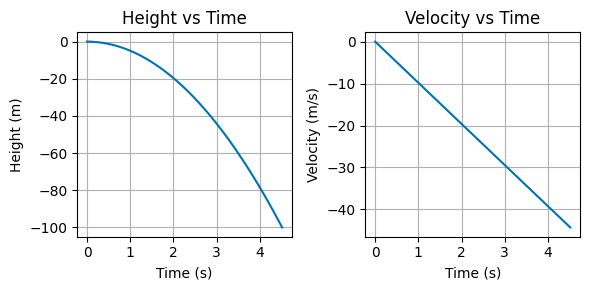

In [13]:
# Plot position and velocity
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(t, y, label='Height')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, v, label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)

plt.tight_layout()
plt.show()

**Is this model useful?**

**Is this model accurate in capturing the freefalling behavior? Why and why not?**

**What may be a more realistic model?**

## Why do we build models?

There are three main reasons:

- to explain complex real-world phenomena,  **(interpretation)**
- to predict when there is uncertainty,     **(accuracy)**
- to make causal inference. 

### Examples (some nuclear physics, some epidemiology)

```{figure} ../img/nuclear-even-even.jpg
---
width: 75%
name: even-even
---
Even-even nuclei on the nuclear landscape {cite:p}`erler2012limits`.
```

```{figure} ../img/multiple-models-prediction.png
---
width: 60%
name: multiple-model-predictions
---
Summary of empirical constraints of the nuclear saturation point {cite:p}`drischler2024bayesian`.
```

```{figure} ../img/seir-model.png
---
width: 60%
name: seir-model
---
Example of compartmental model in epidemiology {cite:p}`reyne2022principles`.
```

## Modeling process

Consider this very general model:

$$ y = f(x; \theta) + \varepsilon,  \text{ where}$$

| Notation | Description                        |
|:---------|:-----------------------------------|
|$y$       | output (*or* outcome, response)    |
|$x$       | input (*or* feature, attribute)    |
|$f$       | model                              |
|$\theta$  | model parameter                    |
|$\varepsilon$ | unexplained error              |


**Questions for any model:**
1. How do we choose a model?
2. How do we quantify the unexplained error?
3. How do we choose the parameters (given data)?
4. How do we evaluate if the model is "good"?

### Penguins as an example

```{figure} ../img/penguins.jpg
---
width: 90%
name: penguin
---
Penguin (www.cabq.gov).
```

Consider the `penguins` dataset that has information about 345 penguins.

Perhaps we are interested in the relationship between the length of their flippers and their body mass

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

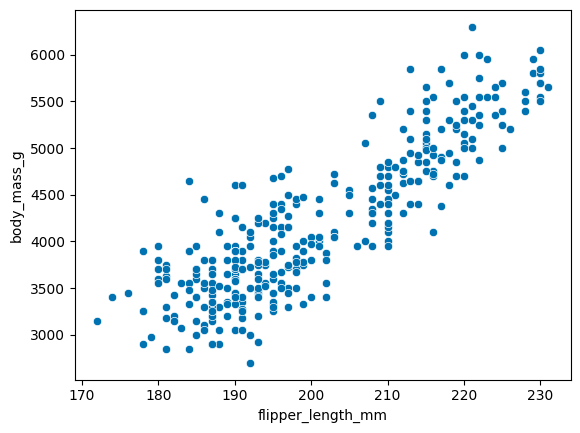

In [22]:
#!pip install seaborn
import seaborn as sns

penguins = sns.load_dataset('penguins')

sns.scatterplot(y='body_mass_g', x='flipper_length_mm', data=penguins)

**Penguins**

1. How do we choose a model?

2. How do we quantify the unexplained error?

3. How do we choose the parameters (given data)?

4. How do we evaluate if the model is "good"?

## Practice 12 - Diamonds

Consider the `diamonds` dataset.  Specifically, investigate the relationship between `carat` and `price`.

Answer the same modeling process questions:

1. How do we choose a model?
2. How do we quantify the unexplained error?
3. How do we choose the parameters (given data)?
4. How do we evaluate if the model is "good"?

In [23]:
diamonds = sns.load_dataset('diamonds')

<Axes: xlabel='carat', ylabel='price'>

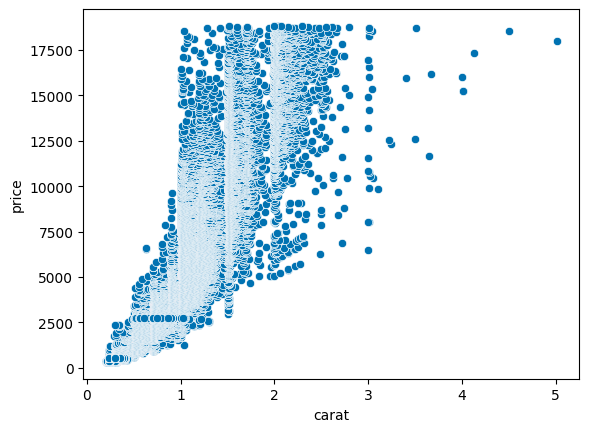

In [25]:
sns.scatterplot(y='price', x='carat', data=diamonds)